# Finding the MSR Portfolio

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
from matplotlib import pyplot as plt

ind = erk.get_ind_returns()
er = erk.annualize_returns(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<AxesSubplot: xlabel='Volatility'>

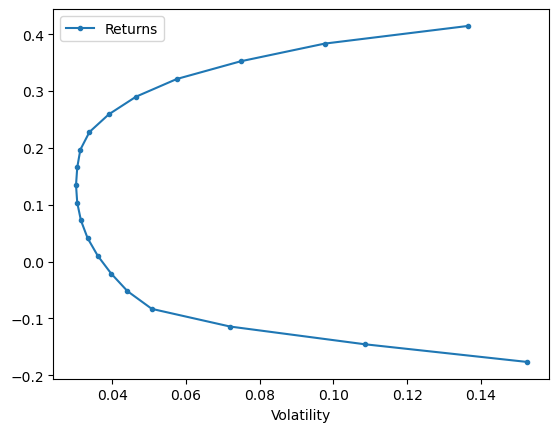

In [2]:
erk.plot_ef(20, er, cov)

Text(0.035961316603456035, 0.24278158379805637, '(0.04,0.24)')

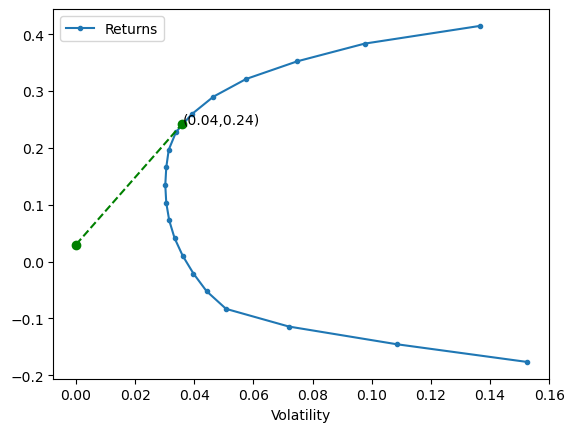

In [18]:
w_msr = erk.msr(0.03, er, cov)
vol_msr = erk.portfolio_vol(w_msr,cov)
r_msr = erk.portfolio_return(w_msr, er)
rf = 0.03
# Add Capital Market Line
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]

ax = erk.plot_ef(20, er, cov)
ax.plot(cml_x, cml_y, color = "green", marker="o", linestyle = "dashed")
plt.text(cml_x[1], cml_y[1], '({:.2f},{:.2f})'.format(cml_x[1],cml_y[1]))

In [16]:
print('Max Sharpe Ratio: ','({:.2f},{:.2f})'.format(cml_x[1],cml_y[1]))

Max Sharpe Ratio:  (0.04,0.24)


<AxesSubplot: xlabel='Volatility'>

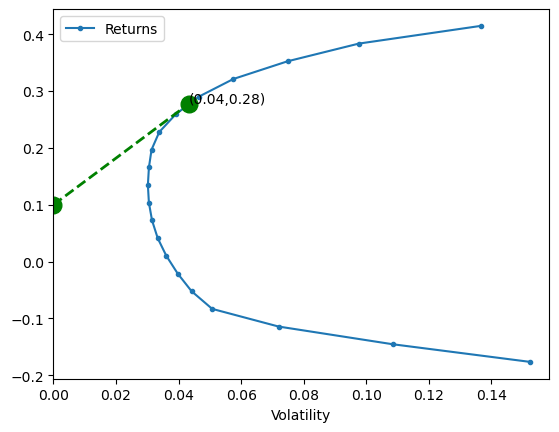

In [22]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)